<a href="https://colab.research.google.com/github/gitmystuff/DTSC4050/blob/main/Week_13-Trees/Tree_Based_Methods_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tree Based Methods



## Decision Trees

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

https://en.wikipedia.org/wiki/Decision_tree

                                      Chillin with some grillin?
                                         Is it cloudy today?
                                            (Root Node)
                                                /\
                                           yes /  \ no
                                              /    \
                                         chance    grillin
                                        of rain?      
                                            /\
                                       yes /  \ no
                                          /    \
                                  no grillin     grillin
                                   

### Decision Tree Terms

* Root Node: Represents our population from which two or more subsets are divided up
* Decision Node: Sub-nodes divided into more sub-nodes based on a decision
* Splitting: dividing a node into sub-nodes
* Leaf / Terminal Node: Node with no children or sub-nodes
* Branch: A section of a decision tree
* Pruning: Eliminating branches and nodes
* Parent / Children: The relationship between nodes and their sub-nodes

**Decision Tree Classifier**

* A   **Decision Tree Classifier** is a supervised machine learning algorithm used for classification tasks.
* It works by recursively partitioning the dataset into smaller subsets based on a series of decision rules.
* Each internal node in the tree represents a test on an attribute (feature).
* Each branch represents the outcome of the test.
* Each leaf node represents a class label (the prediction).
* The algorithm learns these decision rules from the training data to predict the class of a new, unseen data point.
* The goal is to create a tree that accurately classifies data points with minimal complexity.

**CART (Classification and Regression Trees)**

* **CART** is an algorithm that can be used for both classification and regression tasks.
* For classification, it's a type of decision tree classifier.
* CART uses the Gini Impurity as the criterion for splitting nodes. Gini Impurity measures the probability of incorrectly classifying a randomly chosen element if it were randomly labeled according to the distribution of labels in the subset.
* CART produces binary trees (each node has at most two children).
* It handles both categorical and numerical data.
* CART is known for its ability to create complex trees that can overfit the training data, so pruning is often an important step.

**ID3 (Iterative Dichotomiser 3)**

* **ID3** is an earlier algorithm used for building decision tree classifiers.
* ID3 uses Information Gain as the criterion for splitting nodes. Information Gain measures the reduction in entropy (uncertainty) about the target variable after splitting on an attribute.
* ID3 typically works with categorical attributes.
* It doesn't handle missing values directly.
* ID3 can also produce trees that overfit, and pruning may be needed.

**C4.5**

* **C4.5** is an evolution of the ID3 algorithm.
* It improves upon ID3 in several ways:
    * C4.5 can handle both categorical and numerical data.
    * It can deal with missing values.
    * Instead of Information Gain, C4.5 uses Gain Ratio as the splitting criterion. Gain Ratio is a modification of Information Gain that reduces bias towards attributes with many values.
    * C4.5 includes a pruning mechanism to reduce overfitting.

**Key Differences Summarized**

* **Splitting Criterion:** ID3 uses Information Gain, CART uses Gini Impurity, and C4.5 uses Gain Ratio.
* **Data Types:** ID3 primarily handles categorical, while CART and C4.5 can handle both categorical and numerical.
* **Missing Values:** C4.5 can handle missing values, while ID3 has no direct handling.
* **Pruning:** C4.5 has a pruning mechanism, while ID3 and CART may require separate pruning.
* **Tree Structure:** CART produces binary trees.

## Splitting Trees

The idea behind building trees is, finding the best feature to split on, that generates the largest information gain or provides the least uncertainity in the following leafs. Think about a bag of mixed red and blue marbles and splitting the bag into two bags, one with red marbles and the other with blue marbles.

https://www.kaggle.com/code/ma7555/decision-trees-information-gain-from-scratch

Information gain is a decrease in entropy. Decision trees make use of information gain and entropy to determine which feature to split into nodes to get closer to predicting the target and also to determine when to stop splitting.

https://www.askpython.com/python/examples/decision-trees

https://www.analyticsvidhya.com/blog/2020/06/4-ways-split-decision-tree/

* Reduction in Variance
* Gini Impurity
* Entropy
* Information Gain
* Chi Square: See Week 11 - Chi Square

## Our Functions

### Entropy

$H(S) = -p_1 \log_2(p_1) - p_0 \log_2(p_0)$

The entropy of a set S, denoted as H(S), is calculated by taking the negative of the probability of the first class (p₁) multiplied by the base-2 logarithm of that probability, and then subtracting the probability of the second class (p₀) multiplied by the base-2 logarithm of that probability.

In [ ]:
import numpy as np  # We'll need numpy for the logarithm base 2

def entropy(target_col):
    """Calculates the entropy of a target variable with binary classes."""
    elements, counts = np.unique(target_col, return_counts=True)
    probabilities = counts / len(target_col) # Calculates p1 and p0 (probabilities of each class)
    entropy_value = 0
    for prob in probabilities:
        if prob > 0:  # Avoid log(0) error
            entropy_value -= prob * np.log2(prob) # Calculates -p * log2(p) for each class

    return entropy_value # Returns H(S)

### Information Gain

$IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)$

The information gain of splitting a dataset S on an attribute A, denoted as IG(S, A), is determined by taking the initial entropy of the dataset S, represented as H(S), and subtracting the sum of the entropies of each subset Sv created by splitting on the different values (v) of attribute A. Each of these subset entropies, H(Sv), is weighted by the proportion of the number of elements in that subset (|Sv|) relative to the total number of elements in the original dataset (|S|).

In [ ]:
def information_gain(data, split_attribute, target_attribute):
    """Calculates the information gain of splitting on an attribute."""
    # Total entropy of the target variable
    total_entropy = entropy(data[target_attribute]) # H(S)

    # Unique values in the split attribute
    values = data[split_attribute].unique()
    weighted_entropy = 0

    for value in values:
        subset = data[data[split_attribute] == value]
        subset_size = len(subset)
        if subset_size > 0:
            subset_entropy = entropy(subset[target_attribute]) # H(Sv)
            weighted_entropy += (subset_size / len(data)) * subset_entropy # (|Sv| / |S|) * H(Sv)

    # Information Gain
    gain = total_entropy - weighted_entropy # IG(S, A) = H(S) - Σ (|Sv| / |S|) * H(Sv)
    return gain

### Gini Impurity

$Gini(S) = 1 - (p_1^2 + p_0^2)$

The Gini impurity of a set S, denoted as Gini(S), is calculated by taking one and subtracting the sum of the squared probabilities of each class. For a binary classification problem, this means subtracting the square of the probability of the first class (p₁) and the square of the probability of the second class (p₀) from one.

In [ ]:
def gini(target_col):
    """Calculates the Gini impurity of a target variable with binary classes."""
    elements, counts = np.unique(target_col, return_counts=True)
    probabilities = counts / len(target_col) # Calculates p1 and p0 (probabilities of each class)
    gini_value = 1 - np.sum(probabilities**2) # Calculates 1 - (p1^2 + p0^2)
    return gini_value # Returns Gini(S)

### Gini Gain (Reduction in Gini Impurity)

$Gini\_Gain(S, A) = Gini(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Gini(S_v)$

The Gini gain achieved by splitting a dataset S on an attribute A, denoted as Gini\_Gain(S, A), is calculated by taking the initial Gini impurity of the dataset S, represented as Gini(S), and subtracting the weighted sum of the Gini impurities of each subset Sv created by splitting on the different values (v) of attribute A. Each subset's Gini impurity, Gini(Sv), is weighted by the proportion of the number of elements in that subset (|Sv|) relative to the total number of elements in the original dataset (|S|).

In [ ]:
def gini_gain(data, split_attribute, target_attribute):
    """Calculates the Gini gain of splitting on an attribute."""
    # Total Gini impurity of the target variable
    total_gini = gini(data[target_attribute]) # Gini(S)

    # Unique values in the split attribute
    values = data[split_attribute].unique()
    weighted_gini = 0

    for value in values:
        subset = data[data[split_attribute] == value]
        subset_size = len(subset)
        if subset_size > 0:
            subset_gini = gini(subset[target_attribute]) # Gini(Sv)
            weighted_gini += (subset_size / len(data)) * subset_gini # (|Sv| / |S|) * Gini(Sv)

    # Gini Gain
    gain = total_gini - weighted_gini # Gini_Gain(S, A) = Gini(S) - Σ (|Sv| / |S|) * Gini(Sv)
    return gain

## Part One - Target with Two Classes

### Introduction

**Our Goal:** To intuitively understand how Information Gain helps a decision tree choose the best feature to split on at a node, given a binary target variable.

**Scenario:** Imagine we have a small dataset with one feature and a binary target variable (let's say, "Buys Product": Yes/No). We want to see how Information Gain helps us decide if this feature is useful for splitting.

### Step 1: Setting up the Environment and Initial Data

Let's start by importing the necessary library (which is just `pandas` for creating and manipulating our data) and creating our example dataset. I'll verbalize my thought process as I code.

In [ ]:
# Goal: Create a small dataset to demonstrate Information Gain.
import pandas as pd

# Let's imagine we have data on whether a customer clicked on an ad ('Clicked')
# and whether they eventually bought the product ('Bought').
data = {'Clicked': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
        'Bought': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes']}

In [ ]:
# code along
df = pd.DataFrame(data)

# Let's look at our initial data. This helps us understand what we're working with.
print("Initial Dataset:")
print(df)

Initial Dataset:
  Clicked Bought
0     Yes    Yes
1      No     No
2     Yes    Yes
3      No     No
4     Yes    Yes
5     Yes     No
6      No     No
7     Yes    Yes


**(Pause. Any questions about the DataFrame.)**

**Explanation:**

* We import the `pandas` library, which is excellent for working with tabular data in Python. We give it the alias `pd` for convenience.
* We create a dictionary called `data`  (key: value relationship) where the keys are our feature ('Clicked') and our target variable ('Bought'). The values are lists representing the observations for each.
* We then use `pd.DataFrame(data)` to convert this dictionary into a DataFrame, which is a table-like structure.
* Finally, we print the DataFrame to see our initial data.

### Step 2: Understanding Entropy

Entropy measures the impurity or randomness in a set of data. For a binary target, it tells us how mixed the two classes are.

The formula for Entropy (H) for a binary target with probabilities $p_1$ (probability of class 1) and $p_0$ (probability of class 0) is:

$$H(S) = -p_1 \log_2(p_1) - p_0 \log_2(p_0)$$

Let's write a Python function to calculate Entropy.

In [ ]:
# Code along
# Let's calculate the entropy of our 'Bought' column in the initial dataset.
initial_entropy = entropy(df['Bought'])
print(f"\nInitial Entropy of 'Bought': {initial_entropy:.4f}")


Initial Entropy of 'Bought': 1.0000


**Recap of the data:**

```python
import pandas as pd
import numpy as np

data = {'Clicked': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
        'Bought': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes']}

df = pd.DataFrame(data)
```

**Calculating Entropy of 'Bought':**

1.  **Count 'Yes' and 'No':**

    * Number of 'Yes' (Bought): 4
    * Number of 'No' (Not Bought): 4

2.  **Calculate p1 and p0:**

    * p1 (probability of 'Yes') = 4 / (4 + 4) = 0.5
    * p0 (probability of 'No') = 4 / (4 + 4) = 0.5

3.  **Calculate the logarithms:**

    * log2(p1) = log2(0.5) = -1
    * log2(p0) = log2(0.5) = -1

4.  **Apply the Entropy formula:**

    * H(S) = -p1 \* log2(p1) - p0 \* log2(p0)
    * H(S) = -0.5 \* (-1) - 0.5 \* (-1)
    * H(S) = 0.5 + 0.5
    * H(S) = 1

**Here's a summary:**

* p1 (probability of 'Yes'): 0.5
* p0 (probability of 'No'): 0.5
* log2(p1): -1
* log2(p0): -1
* Entropy H(S): 1

This shows that the 'Bought' column in our initial dataset has maximum entropy (1), indicating an equal proportion of 'Yes' and 'No' outcomes.': {initial_entropy:.4f}")

**(Pause. Interpret the entropy value. A higher value indicates more impurity.)**

**Explanation:**

* We import the `numpy` library as `np` for numerical operations, specifically the base-2 logarithm (`np.log2`).
* The `entropy` function takes a target column (a pandas Series) as input.
* `np.unique(target_col, return_counts=True)` efficiently finds the unique values in the column and their counts.
* We calculate the probabilities of each class by dividing the counts by the total number of observations.
* We initialize `entropy_value` to 0 and then iterate through the probabilities. For each probability greater than 0, we add `-prob * np.log2(prob)` to the `entropy_value`. We handle the case where a probability is 0 to avoid a `log(0)` error.
* Finally, we calculate and print the initial entropy of our 'Bought' column.

* **"An entropy of 1 indicates a perfectly balanced or equally distributed class distribution in a binary target variable."**
* **"With an entropy of 1, there is maximum uncertainty about the outcome of the target variable."**
* **"An entropy of 1 signifies that the data is maximally impure with respect to the binary target, as both classes have an equal probability of occurrence."**
* **"In the context of decision trees, a node with an entropy of 1 provides the least information about which class a data point belongs to."**

### Step 3: Understanding Information Gain

Information Gain (IG) measures the reduction in entropy achieved after splitting the dataset on a particular attribute. It tells us how much "purity" we gain by knowing the value of a feature.

The formula for Information Gain (IG) of an attribute $A$ on a dataset $S$ is:

$$IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)$$

Where:

* $H(S)$ is the entropy of the original dataset $S$.
* $Values(A)$ are the unique values of the attribute $A$.
* $S_v$ is the subset of $S$ where attribute $A$ has the value $v$.
* $|S_v|$ is the number of elements in $S_v$.
* $|S|$ is the total number of elements in $S$.
* $H(S_v)$ is the entropy of the target variable in the subset $S_v$.

Let's calculate the Information Gain for our 'Clicked' feature.

In [ ]:
# Code along
# Calculate the Information Gain of splitting on 'Clicked' to predict 'Bought'.
gain_clicked = information_gain(df, 'Clicked', 'Bought')
print(f"Information Gain of splitting on 'Clicked': {gain_clicked:.4f}")

**(Pause. A higher Information Gain suggests a better split.)**

**Explanation:**

* The `information_gain` function takes the data, the attribute to split on (`split_attribute`), and the target attribute (`target_attribute`) as input.
* First, it calculates the `total_entropy` of the target variable in the original dataset using our `entropy` function.
* It then gets the unique values of the `split_attribute`.
* We iterate through each unique value of the split attribute:
    * We create a `subset` of the data containing only the rows where the `split_attribute` equals the current `value`.
    * We calculate the size of this `subset`.
    * If the subset is not empty, we calculate the entropy of the `target_attribute` within this `subset`.
    * We then add the weighted entropy of this subset to the `weighted_entropy`. The weight is the proportion of observations in the subset compared to the total dataset size.
* Finally, the `information gain` is calculated as the difference between the `total_entropy` and the `weighted_entropy`.

**Formula:**

$$IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)$$

Where:

* $IG(S, A)$: Information Gain of splitting dataset $S$ on attribute $A$.
* $H(S)$: Entropy of the target variable in the original dataset $S$.
* $Values(A)$: The unique values of attribute $A$.
* $v$: A specific value within $Values(A)$.
* $S_v$: The subset of $S$ where attribute $A$ has the value $v$.
* $|S_v|$: The number of instances in the subset $S_v$.
* $|S|$: The total number of instances in the original dataset $S$.
* $H(S_v)$: Entropy of the target variable in the subset $S_v$.

**Our Dataset:**

```python
import pandas as pd
import numpy as np

data = {'Clicked': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
        'Bought': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes']}
df = pd.DataFrame(data)
```

**Let's calculate the Information Gain for splitting on the attribute 'Clicked' (so, $A$ = 'Clicked'):**

1.  **$H(S)$ (Entropy of the target 'Bought' in the original dataset):**
    We calculated this earlier: $H(S) = 1$

2.  **$Values(A)$ (Unique values of 'Clicked'):**
    $Values(\text{'Clicked'}) = \{\text{'Yes'}, \text{'No'}\}$

3.  **For $v = \text{'Yes'}$:**
    * $S_{\text{'Yes'}}$: The subset where 'Clicked' is 'Yes'.
        ```
          Clicked Bought
        0     Yes    Yes
        2     Yes    Yes
        4     Yes    Yes
        5     Yes     No
        7     Yes    Yes
        ```
    * $|S_{\text{'Yes'}}| = 5$
    * $|S| = 8$
    * $H(S_{\text{'Yes'}})$: Entropy of 'Bought' where 'Clicked' is 'Yes'.
        * 'Yes' count: 4
        * 'No' count: 1
        * Total: 5
        * $p_{\text{'Yes'}} = 4/5 = 0.8$
        * $p_{\text{'No'}} = 1/5 = 0.2$
        * $H(S_{\text{'Yes'}}) = - (0.8 \log_2(0.8) + 0.2 \log_2(0.2)) \approx - (0.8 * -0.322 + 0.2 * -2.322) \approx 0.258 + 0.464 \approx 0.722$

4.  **For $v = \text{'No'}$:**
    * $S_{\text{'No'}}$: The subset where 'Clicked' is 'No'.
        ```
          Clicked Bought
        1      No     No
        3      No     No
        6      No     No
        ```
    * $|S_{\text{'No'}}| = 3$
    * $|S| = 8$
    * $H(S_{\text{'No'}})$: Entropy of 'Bought' where 'Clicked' is 'No'.
        * 'Yes' count: 0
        * 'No' count: 3
        * Total: 3
        * $p_{\text{'Yes'}} = 0/3 = 0$
        * $p_{\text{'No'}} = 3/3 = 1$
        * $H(S_{\text{'No'}}) = - (0 \log_2(0) + 1 \log_2(1))$
            * Note: We typically treat $0 \log_2(0)$ as 0 by convention in information theory.
        * $H(S_{\text{'No'}}) = - (0 + 1 * 0) = 0$

5.  **Calculate the summation part:**
    $$\sum_{v \in Values(\text{'Clicked'})} \frac{|S_v|}{|S|} H(S_v) = \left( \frac{|S_{\text{'Yes'}}|}{8} H(S_{\text{'Yes'}}) \right) + \left( \frac{|S_{\text{'No'}}|}{8} H(S_{\text{'No'}}) \right)$$
    $$= \left( \frac{5}{8} * 0.722 \right) + \left( \frac{3}{8} * 0 \right)$$
    $$\approx 0.451 + 0 = 0.451$$

6.  **Calculate Information Gain:**
    $$IG(S, \text{'Clicked'}) = H(S) - \sum_{v \in Values(\text{'Clicked'})} \frac{|S_v|}{|S|} H(S_v)$$
    $$IG(S, \text{'Clicked'}) \approx 1 - 0.451 \approx 0.549$$

**Therefore, for splitting on the 'Clicked' attribute, the values in the formula are:**

* $H(S) = 1$
* $Values(A) = \{\text{'Yes'}, \text{'No'}\}$
* For $v = \text{'Yes'}$:
    * $\frac{|S_v|}{|S|} = \frac{5}{8} = 0.625$
    * $H(S_v) \approx 0.722$
* For $v = \text{'No'}$:
    * $\frac{|S_v|}{|S|} = \frac{3}{8} = 0.375$
    * $H(S_v) = 0$
* $\sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v) \approx 0.451$
* $IG(S, \text{'Clicked'}) \approx 0.549$

By performing similar calculations for other features (if we had them), we could determine which feature provides the highest Information Gain and should be chosen for the first split in our decision tree.

### Step 4: Interpreting the Result

The Information Gain value tells us how much the entropy (impurity) of the 'Bought' variable is reduced when we split the data based on whether a customer 'Clicked' on the ad or not. A higher Information Gain indicates that this split is more effective in separating the classes of the target variable.

**(Does 'Clicked' seem like a good predictor of 'Bought' based on Information Gain?)**



**Yes, based on the Information Gain of approximately 0.549, 'Clicked' seems like a reasonably good predictor of 'Bought' in this dataset.**

Here's why:

* **Reduction in Uncertainty:** The Information Gain value represents the reduction in the entropy (uncertainty) of the 'Bought' variable after splitting the dataset based on the 'Clicked' feature. An Information Gain of 0.549 means that by knowing whether a customer clicked, we reduce the uncertainty about whether they bought the product by about 0.549 bits.

* **Moving Towards Purity:** The entropy of the 'Bought' variable in the original dataset was 1 (maximum impurity, even split). After splitting on 'Clicked', the weighted average entropy of the resulting subsets is approximately 0.451 (1 - 0.549). This decrease in entropy indicates that the subsets created by the split on 'Clicked' are more "pure" with respect to the 'Bought' variable than the original dataset.

    * When 'Clicked' is 'Yes', the probability of 'Bought' being 'Yes' is 0.8 (80%), which is higher than the original 0.5.
    * When 'Clicked' is 'No', the probability of 'Bought' being 'No' is 1.0 (100%), indicating a perfectly pure subset.

* **Information Value:** A non-zero Information Gain implies that the 'Clicked' feature provides some information that helps in distinguishing between customers who bought and those who didn't. A higher Information Gain generally suggests a more informative feature for the split. While 0.549 isn't the absolute maximum possible (which is 1 for a binary target), it's a significant reduction from the initial entropy, suggesting that 'Clicked' is a useful feature for making this prediction.

**In contrast:**

* An Information Gain close to 0 would suggest that splitting on that feature doesn't significantly reduce the uncertainty about the target variable, making it a poor predictor for that split.
* An Information Gain of 1 (in a binary case) would indicate a perfect separation of the target classes based on the feature.

**Therefore, the Information Gain of 0.549 suggests that 'Clicked' is a valuable feature for the first split in a decision tree aimed at predicting 'Bought'. It helps to create more homogeneous groups with respect to the target variable.**

### Step 5: Gini Impurity

Now let's move on to Gini Impurity. Gini Impurity is another measure of impurity used in decision trees, especially in algorithms like CART (Classification and Regression Trees). For a binary target with probabilities $p_1$ and $p_0$, the Gini Impurity is:

$$Gini(S) = 1 - (p_1^2 + p_0^2)$$

Let's write a Python function to calculate Gini Impurity.

In [ ]:
# Code along
# Let's calculate the Gini impurity of our 'Bought' column in the initial dataset.
initial_gini = gini(df['Bought'])
print(f"\nInitial Gini Impurity of 'Bought': {initial_gini:.4f}")

**(Pause. Compare the Gini value to the Entropy value – they both represent impurity.)**

**Explanation:**

* The `gini` function takes a target column as input.
* Similar to the `entropy` function, it calculates the probabilities of each class.
* The Gini Impurity is then calculated using the formula $1 - \sum_{i} p_i^2$, where $p_i$ is the probability of class $i$. For our binary case, this simplifies to $1 - (p_1^2 + p_0^2)$.

### Step 6: Gini Gain (Reduction in Gini Impurity)

Similar to Information Gain, we can calculate the reduction in Gini Impurity after a split. The feature with the largest Gini Gain would be chosen for the split.

$$Gini\_Gain(S, A) = Gini(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Gini(S_v)$$

Let's write a function for Gini Gain.

In [ ]:
# Code along
# Calculate the Gini Gain of splitting on 'Clicked' to predict 'Bought'.
gain_clicked_gini = gini_gain(df, 'Clicked', 'Bought')
print(f"Gini Gain of splitting on 'Clicked': {gain_clicked_gini:.4f}")

**(Pause. How does the Gini Gain value relate to the Information Gain.)**

**Explanation:**

* The `gini_gain` function mirrors the structure of the `information_gain` function.
* It calculates the initial Gini impurity of the target variable.
* It then iterates through the unique values of the split attribute, calculates the Gini impurity of the target within each subset, and weights it by the subset size.
* The Gini Gain is the difference between the initial Gini impurity and the weighted Gini impurity after the split.



### Step 7: Entropy (Revisited with a Slightly Different Perspective)

Finally, let's briefly revisit Entropy. You've already seen the formula. The key takeaway for splitting is that we want to choose a split that *reduces* the entropy the most (which is what Information Gain measures). A node with low entropy (closer to 0) is more "pure," meaning it predominantly contains instances of a single class.

**(Reiterate the meaning of Entropy in terms of uncertainty or randomness.)**

### Step 8: Demonstration of Choosing the First Split

Let's imagine we had another feature in our dataset, say 'Age Group' (e.g., 'Young', 'Old'). We would calculate the Information Gain (or Gini Gain) for both 'Clicked' and 'Age Group' and choose the feature with the higher gain to be the root node of our decision tree.

<pre>
                              Is Clicked?
                                  / \
                             yes /   \ no
                                /     \
                              Age    No Buy
                              / \
                       Young /   \ Old
                            /     \
                         Buy     No Buy
</pre>

In [ ]:
# Let's add a hypothetical 'Age Group' feature
df['Age Group'] = ['Young', 'Old', 'Young', 'Young', 'Old', 'Young', 'Old', 'Old']
print("\nDataset with 'Age Group':")
print(df)

# Calculate Information Gain for 'Age Group'
gain_age_group = information_gain(df, 'Age Group', 'Bought')
print(f"Information Gain of splitting on 'Age Group': {gain_age_group:.4f}")

# Compare the Information Gains
print("\nComparing Information Gains:")
print(f"Information Gain ('Clicked'): {gain_clicked:.4f}")
print(f"Information Gain ('Age Group'): {gain_age_group:.4f}")

# Based on the higher Information Gain, the first split would be on the feature with the larger value.
if gain_clicked > gain_age_group:
    print("\n'Clicked' would be chosen as the first splitting node based on Information Gain.")
else:
    print("\n'Age Group' would be chosen as the first splitting node based on Information Gain.")

**(Why does one feature have a higher Information Gain than another based on how well it separates the target classes.)**

**Explanation:**

* We add a new feature 'Age Group' to our DataFrame.
* We calculate the Information Gain for splitting on 'Age Group' using our `information_gain` function.
* We then compare the Information Gain of 'Clicked' and 'Age Group' and print which feature would be chosen as the root node based on this metric.

### Step 9: Pruning (Brief Introduction)

After a tree is built, it might overfit the training data. Pruning is a technique to reduce the size of the tree by removing parts that do not provide significant predictive power on unseen data. This helps to improve the generalization ability of the tree.

**Conclusion:**

By following along with this code and the explanations, students should gain a more intuitive understanding of:

* How Entropy measures the impurity of a node.
* How Information Gain quantifies the reduction in entropy after a split.
* How Gini Impurity provides another measure of impurity.
* How Decision Trees use these metrics to decide which feature to split on at each node.

Remember to encourage questions throughout the lesson and provide opportunities for students to experiment with the code (e.g., by changing the initial data). This active engagement will reinforce their learning.

### Procedural Summary

1.  **Start with the entropy of the target:**
    * This is the initial step. You need to quantify the impurity or randomness of your target variable in the entire dataset *before* making any splits. This initial entropy serves as the baseline.

2.  **With this entropy, find the information gain for each feature:**
    * For each feature in your dataset, you consider it as a potential splitting attribute.
    * For each feature, you calculate how much the entropy of the target variable would be *reduced* if you were to split the dataset based on the values of that feature.
    * This reduction in entropy is what we call the **Information Gain**. It measures how much "information" a feature provides about the target variable.

3.  **Split on the feature with the highest information gain:**
    * The feature that yields the largest Information Gain is considered the most effective at separating the classes of the target variable.
    * Therefore, the decision tree algorithm chooses this feature to perform the split at the current node (initially the root node).

After the first split, the process is repeated recursively for each of the resulting subsets (branches):

* For each subset, you recalculate the entropy of the target variable within that subset.
* Then, you calculate the Information Gain for all the *remaining* features (those not already used for splitting in that branch).
* You choose the feature with the highest Information Gain to split that subset further.
* This process continues until a stopping condition is met (e.g., a node becomes pure (entropy is 0), a maximum tree depth is reached, or the Information Gain from further splitting is below a certain threshold).

**In summary, this procedure describes the core logic of the greedy approach used by many decision tree algorithms (like ID3 and C4.5) that rely on Information Gain for feature selection.**

## Part Two - Target with Three Classes

### Introduction

**Our Goal:** To understand how Information Gain, Gini Impurity, and Entropy guide the splitting of a decision tree when the target variable has three distinct classes.

**Scenario:** Imagine we have a dataset about different types of fruits based on their color, size, shape, and texture, and our target variable is the fruit type (Apple, Banana, Orange).

### Step 1: Setting up the Environment and Initial Data

In [ ]:
import pandas as pd
import numpy as np

# Our fruit dataset
data = {'Color': ['Red', 'Yellow', 'Orange', 'Red', 'Yellow', 'Orange', 'Red', 'Yellow', 'Orange', 'Red', 'Yellow', 'Orange'],
        'Size': ['Large', 'Medium', 'Medium', 'Large', 'Small', 'Large', 'Medium', 'Small', 'Medium', 'Large', 'Medium', 'Small'],
        'Shape': ['Round', 'Elongated', 'Round', 'Round', 'Elongated', 'Round', 'Round', 'Elongated', 'Round', 'Round', 'Elongated', 'Round'],
        'Texture': ['Smooth', 'Smooth', 'Rough', 'Smooth', 'Smooth', 'Rough', 'Smooth', 'Smooth', 'Rough', 'Smooth', 'Smooth', 'Rough'],
        'Fruit': ['Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Orange']}

In [ ]:
# Code along
df = pd.DataFrame(data)

print("Initial Fruit Dataset:")
print(df)

**(Pause. Think about the features and the target variable.)**

**Explanation:**

* We import `pandas` for data manipulation and `numpy` for numerical operations.
* We create a dictionary `data` representing our fruit dataset with four features ('Color', 'Size', 'Shape', 'Texture') and the target variable 'Fruit' (with three classes: 'Apple', 'Banana', 'Orange').
* We convert this dictionary into a pandas DataFrame.
* We print the DataFrame to see our initial data.

### Step 2: Understanding Entropy (Multi-Class)

The formula for Entropy (H) for a multi-class target variable with probabilities $p_1, p_2, ..., p_n$ for each of the $n$ classes is:

$$H(S) = - \sum_{i=1}^{n} p_i \log_2(p_i)$$

Our `entropy` function from before will actually work directly for the multi-class case! Let's recalculate the initial entropy of our 'Fruit' column.

In [ ]:
# Code along
# Let's recalculate the entropy of our 'Fruit' column.
initial_entropy = entropy(df['Fruit'])
print(f"\nInitial Entropy of 'Fruit': {initial_entropy:.4f}")

**(Pause. Interpret the entropy value in the context of three classes. A higher value still indicates more impurity or a more even distribution of the fruit types.)**

### Step 3: Information Gain (Multi-Class)

The formula for Information Gain remains the same, but now the entropy calculations within the subsets will also consider the three classes of the 'Fruit' variable.

$$IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)$$

Let's calculate the Information Gain for each of our features ('Color', 'Size', 'Shape', 'Texture').

In [ ]:
# Code along
# Calculate Information Gain for each feature
features = ['Color', 'Size', 'Shape', 'Texture']
for feature in features:
    gain = information_gain(df, feature, 'Fruit')
    print(f"Information Gain of splitting on '{feature}': {gain:.4f}")

**(Pause. Which feature seems most promising for the first split based on these values.)**

**Explanation:**

* We iterate through each of our features.
* For each feature, we use our `information_gain` function (which we defined earlier and works for multi-class targets) to calculate how much the entropy of 'Fruit' is reduced by splitting on that feature.
* The output shows the Information Gain for each potential first split. The feature with the highest Information Gain would be chosen as the root node.

### Step 4: Understanding Gini Impurity (Multi-Class)

For a multi-class target with probabilities $p_1, p_2, ..., p_n$, the Gini Impurity is:

$$Gini(S) = 1 - \sum_{i=1}^{n} p_i^2$$

Our `gini` function from before also works directly for the multi-class case! Let's calculate the initial Gini Impurity of our 'Fruit' column.

In [ ]:
# Code along
# Let's recalculate the Gini Impurity of our 'Fruit' column.
initial_gini = gini(df['Fruit'])
print(f"\nInitial Gini Impurity of 'Fruit': {initial_gini:.4f}")

**(Pause. Compare the Gini value to the entropy value. Both represent impurity, but they are calculated differently.)**

### Step 5: Gini Gain (Multi-Class)

The formula for Gini Gain remains the same:

$$Gini\_Gain(S, A) = Gini(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Gini(S_v)$$

Let's calculate the Gini Gain for each of our features.

In [ ]:
# Code along
# Calculate Gini Gain for each feature
for feature in features:
    gain_gini = gini_gain(df, feature, 'Fruit')
    print(f"Gini Gain of splitting on '{feature}': {gain_gini:.4f}")

**(Pause. Observe the Gini Gain for each feature. Which feature seems most promising for the first split based on these values?)**

**Explanation:**

* We iterate through each of our features.
* For each feature, we use our `gini_gain` function (which also works for multi-class targets) to calculate the reduction in Gini Impurity by splitting on that feature.
* The output shows the Gini Gain for each potential first split. The feature with the highest Gini Gain would be chosen as the root node if we were using Gini Impurity as our splitting criterion.

### Step 6: Demonstration of Choosing the First Split (Multi-Class)

By comparing the Information Gain (or Gini Gain) values for all the features, the decision tree algorithm will choose the feature that provides the highest gain as the first splitting node. This process will then be repeated recursively for each resulting subset of the data.

In [ ]:
# Comparing Information Gains to choose the first split
best_feature_ig = None
max_ig = -1
for feature in features:
    gain = information_gain(df, feature, 'Fruit')
    if gain > max_ig:
        max_ig = gain
        best_feature_ig = feature

print(f"\nBased on Information Gain, the first split would be on '{best_feature_ig}' with a gain of {max_ig:.4f}.")

# Comparing Gini Gains to choose the first split
best_feature_gini = None
max_gini_gain = -1
for feature in features:
    gain_gini = gini_gain(df, feature, 'Fruit')
    if gain_gini > max_gini_gain:
        max_gini_gain = gain_gini
        best_feature_gini = feature

print(f"Based on Gini Gain, the first split would be on '{best_feature_gini}' with a gain of {max_gini_gain:.4f}.")

**(Pause. Did Information Gain and Gini Gain suggest the same feature for the first split in this example? Why might they sometimes differ?)**

After the first split, this process is repeated for each of the resulting branches. For example, if 'Color' was chosen as the first split, we would then consider the subsets of data where 'Color' is 'Red', 'Yellow', and 'Orange' separately. For each of these subsets, we would again calculate the Information Gain (or Gini Gain) for the remaining features ('Size', 'Shape', 'Texture') to decide the next split, and so on. This continues until a stopping criterion is met (e.g., a node becomes pure, a maximum depth is reached, or the gain from splitting is below a certain threshold).

Pruning is still an important step in multi-class decision trees to avoid overfitting the training data and improve generalization to new, unseen data. The same principles of pre-pruning and post-pruning apply.

**Conclusion:**

By working through this example with a multi-class target, students should now understand how Entropy, Information Gain, and Gini Impurity extend to situations with more than two classes. The core principle remains the same: to choose splits that maximize the reduction in impurity at each node, leading to more homogeneous leaf nodes with respect to the target variable.

## Iris

### The Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1),
                                                    df['species'],
                                                    test_size=0.20,
                                                    random_state=42)

print(X_train.shape)
print(X_train.head())

(120, 4)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2


### Decision Tree Classifier Model and Tree

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2


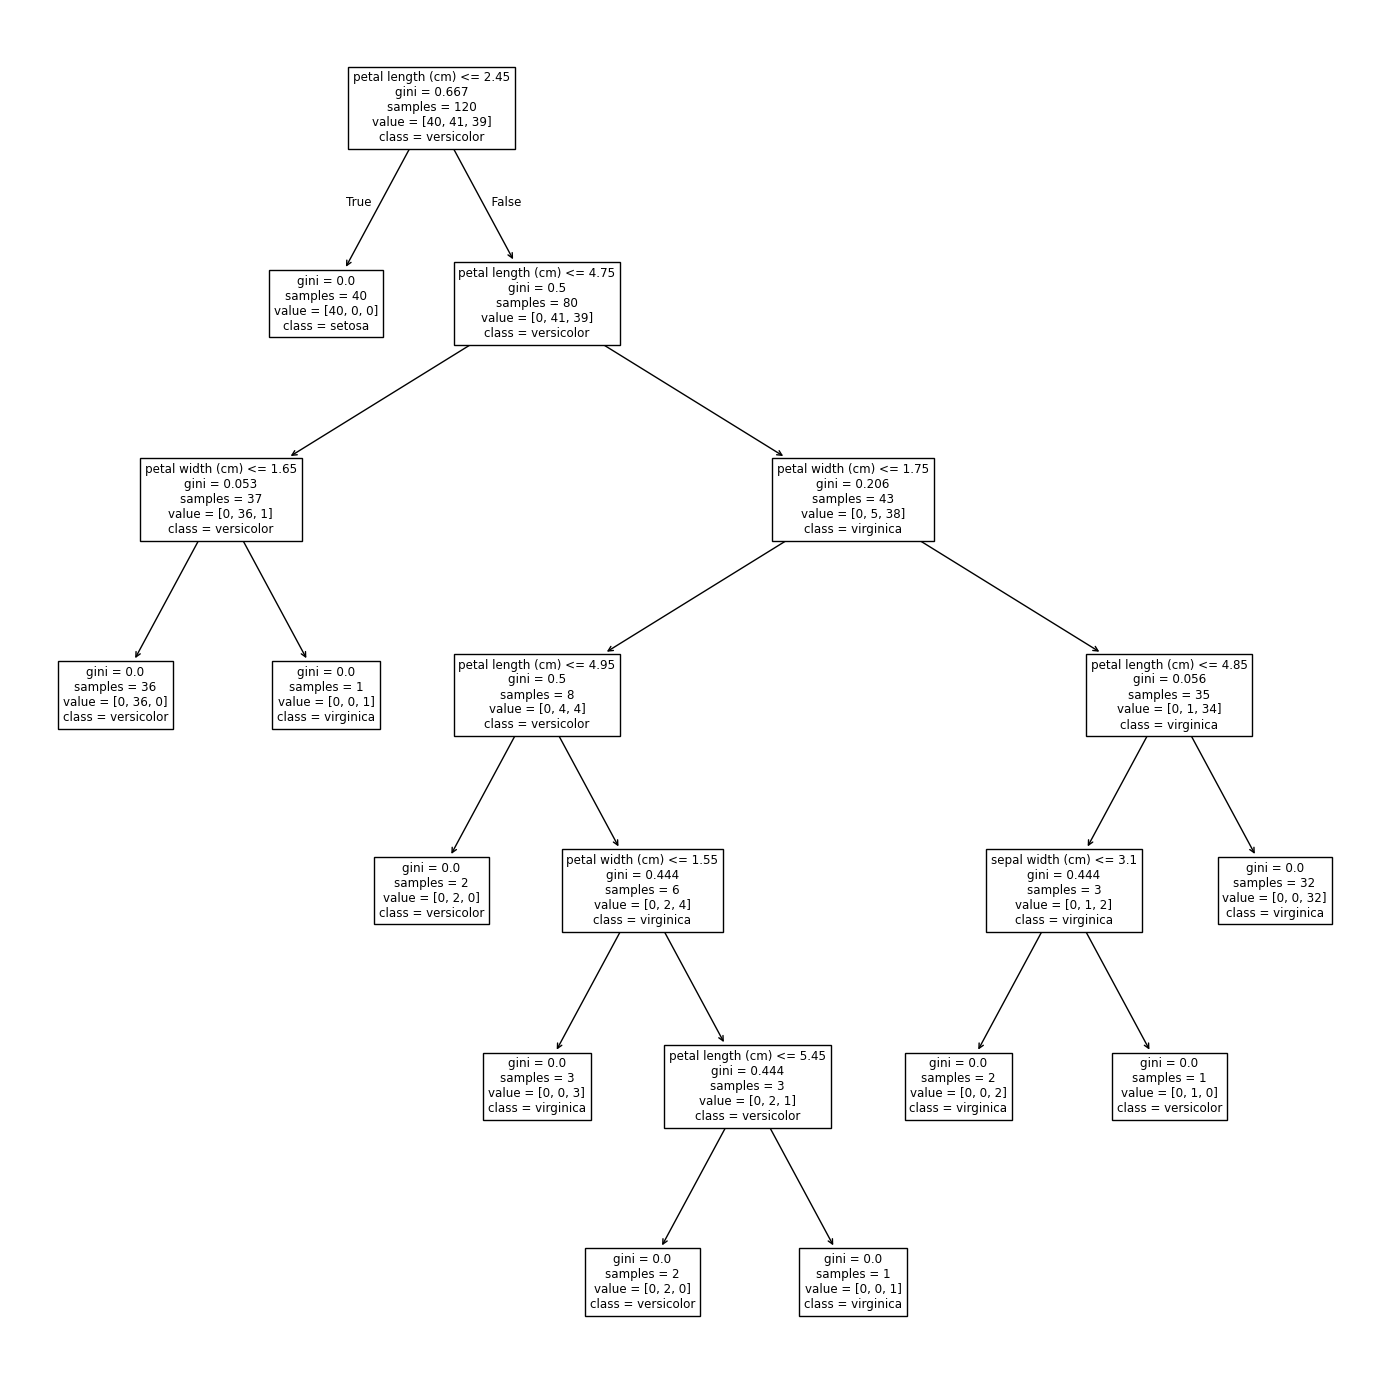

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

print(X_train.head())

model = DecisionTreeClassifier(criterion='gini', random_state=42).fit(X_train, y_train)

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

In [ ]:
# example gini score on petal length
1 - np.sum(np.square(y_train.value_counts(normalize=True)))

np.float64(0.6665277777777778)

### Natural Splits

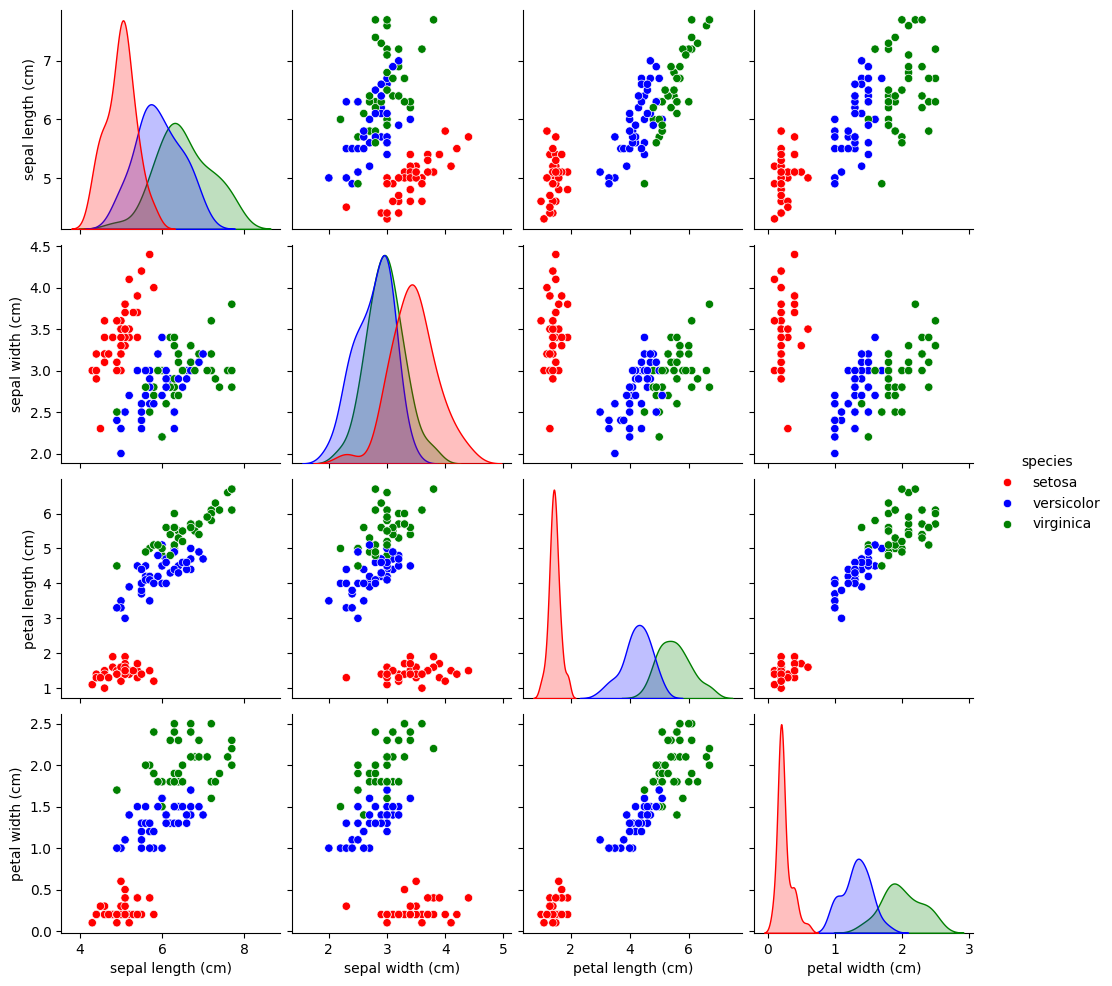

In [ ]:
example = X_train.copy()
example['species'] = y_train

sns.pairplot(example, hue='species', palette=['red', 'blue', 'green']);

**Pair Plot**

* **Petal Length vs. Other Features:** In every scatter plot where petal length is involved (first row, third column), *setosa* (red) is clearly separated along the petal length axis.
* **Petal Width vs. Other Features:** The same is true for petal width (fourth column, second row); *setosa* is well-separated.
* **Petal Length vs. Petal Width:** This plot shows *setosa* forming a distinct cluster in the lower-left corner, reinforcing that both features together provide excellent separation.

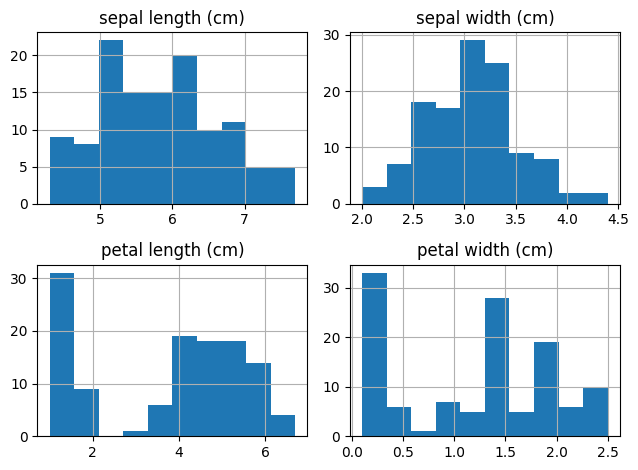

In [ ]:
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout();

**Histograms**

* **Petal Length Histogram:** The histogram for petal length shows a distinct group on the far left (around 1-2 cm) that corresponds to *setosa* (red in the pair plot). There's a clear separation from the other two species, which have petal lengths mostly greater than 3 cm.
* **Petal Width Histogram:** Similarly, the petal width histogram shows *setosa* grouped on the far left (around 0-0.5 cm), well-separated from the *versicolor* and *virginica* distributions.

**Explanation**

The visual separation in both the histograms and pair plots indicates that *setosa* has consistently smaller petal lengths and widths compared to *versicolor* and *virginica*. This "natural" separation means a decision tree can easily use these features to create simple rules (like "petal length <= a threshold") to isolate *setosa* with high accuracy, as seen in the decision tree where the first split is on petal length.

### Partitioning Examples

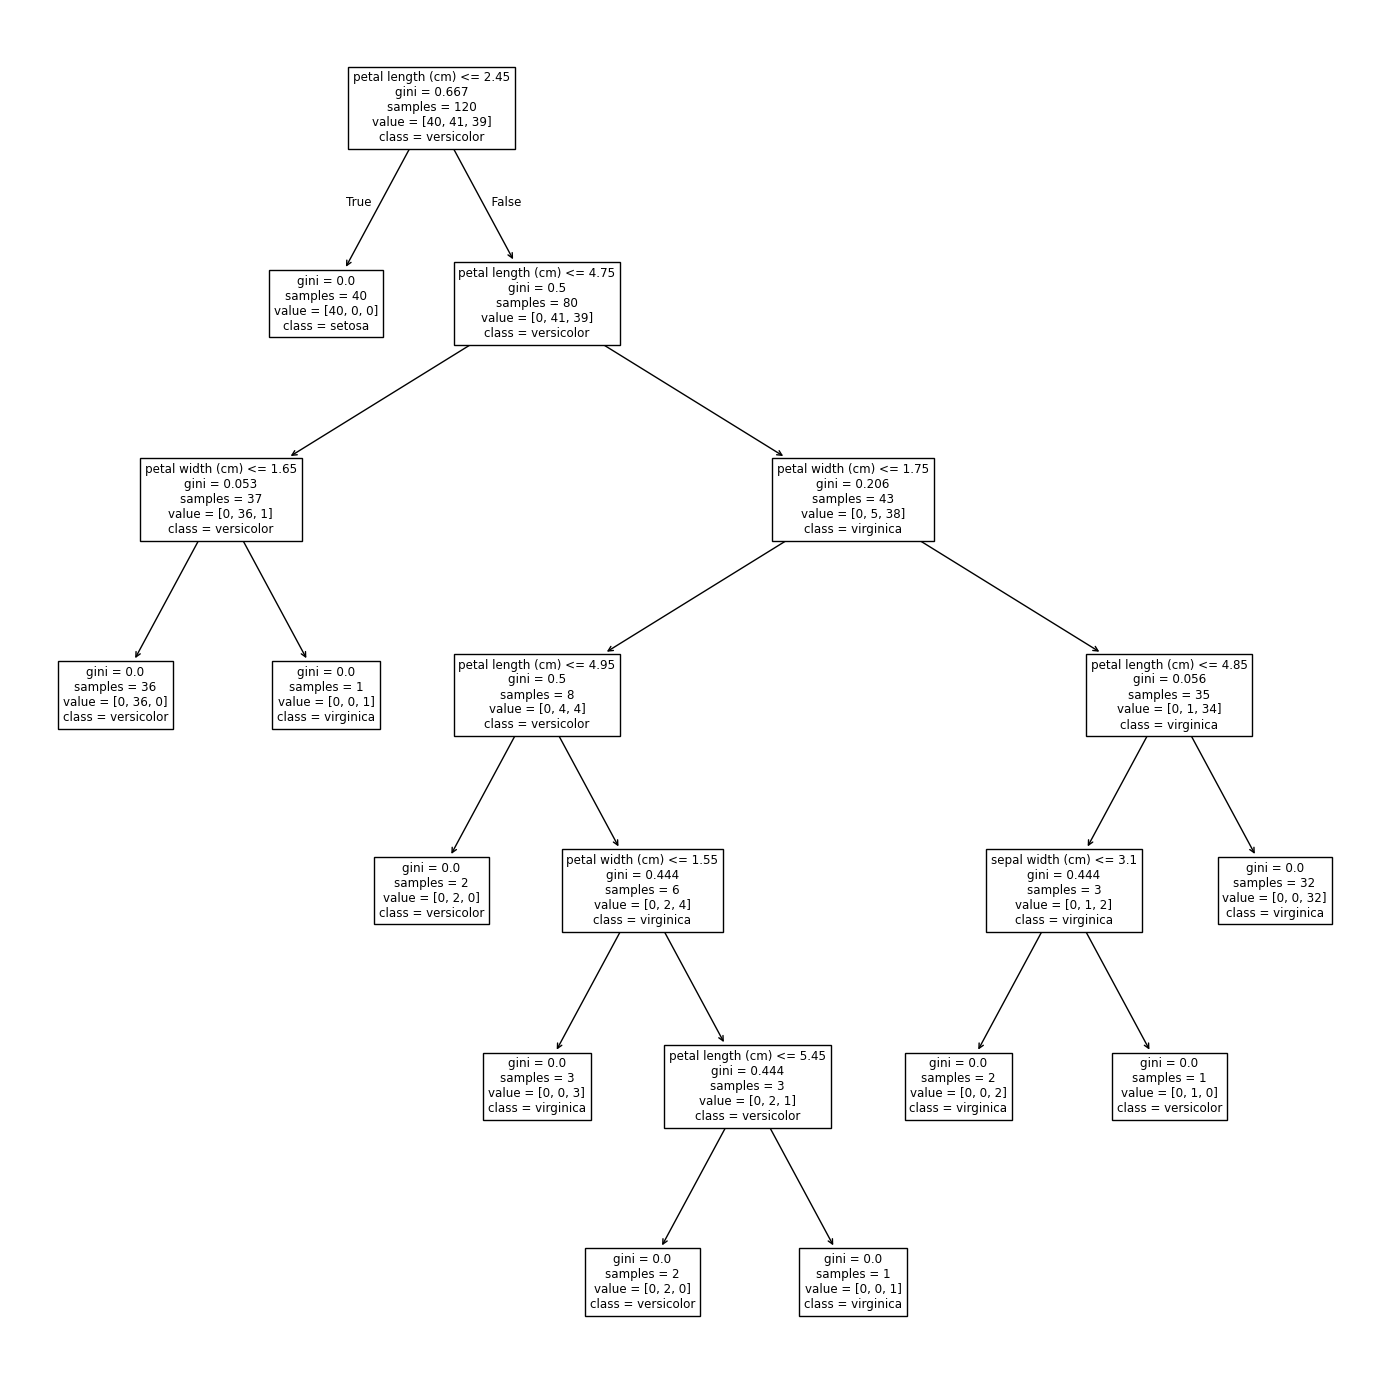

In [ ]:
plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

where does the decision tree model get the specific values it uses for splitting (like `petal length (cm) <= 2.45`). Let's clarify this:

**The Model Learns the Split Values from the Training Data**

The decision tree algorithm *learns* these threshold values (e.g., 2.45 for petal length, 1.65 or 1.75 for petal width) directly from the **training data** you provide it.  It doesn't pull them out of thin air or use some pre-defined list.

Here's a more detailed breakdown:

1.  **Training Data:**
    * You start with a dataset (like the Iris dataset) that contains measurements of features (petal length, petal width, sepal length, sepal width) for a set of samples, along with the known class or category (species) for each sample.
    * This dataset is typically split into two parts:
        * **Training set:** This is the portion of the data the model uses to learn the relationships between features and the target variable (species).
        * **Testing set:** This is a separate portion used to evaluate how well the model generalizes to new, unseen data.

2.  **Algorithm's Search for Optimal Splits:**
    * The decision tree algorithm (like CART, ID3, or C4.5) examines the training data to find the best way to split the data at each node.
    * "Best" is defined based on a criterion like:
        * **Information Gain (for ID3, C4.5):** How much does this split reduce the entropy (uncertainty) about the target variable?
        * **Gini Impurity (for CART):** How much does this split reduce the "impurity" (mixing of classes) in the resulting subsets?
    * To find the best split, the algorithm essentially tries out different possible threshold values for each feature.
    * For example, for 'petal length', it might try splitting at 2.0 cm, 2.1 cm, 2.2 cm, 2.3 cm, 2.4 cm, 2.45 cm, 2.5 cm, and so on, evaluating the Information Gain or Gini Impurity for each potential split.
    * The algorithm then selects the threshold value that results in the greatest improvement in the chosen criterion (highest Information Gain or lowest Gini Impurity).

3.  **Example with Petal Length <= 2.45:**
    * In the tree you provided, the algorithm found that splitting the data at `petal length (cm) <= 2.45` produced the most significant reduction in impurity (or increase in Information Gain) at that stage of the tree building process.
    * This means that, among all the possible petal length values, 2.45 cm was the best at separating the Iris species in the training data at that point.

4.  **No Predefined Values:**
    * It's crucial to understand that the algorithm is *calculating* and *selecting* these values based on the data. It's not using any pre-set list of petal length or width values.
    * If you trained the same model on a slightly different training set (a different random sample of the Iris data), the exact split values might be slightly different, although the overall structure of the tree would likely be similar.

**In essence:** The decision tree model learns the rules (including the threshold values for splitting) by analyzing patterns in the training data and finding the splits that best organize the data points according to the target variable.

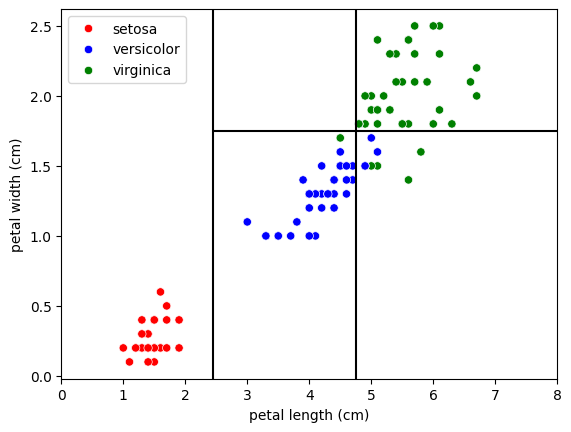

In [ ]:
# plot using hue to show different classes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=example['petal length (cm)'],
                y=example['petal width (cm)'],
                hue=example['species'],
                palette=['red', 'blue', 'green'])
plt.axvline(x=2.45, color='black')
plt.axvline(x=4.75, color='black')
plt.hlines(y=1.75, xmin=2.45, xmax=8, color='black')

plt.xlim(0, 8)
plt.legend()
plt.show()

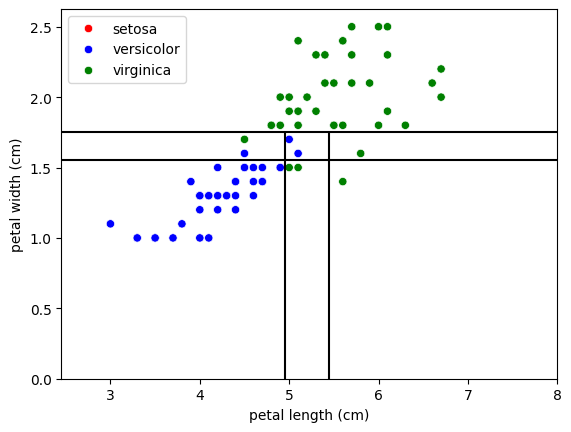

In [ ]:
# plot using hue to show different classes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=example['petal length (cm)'][example['petal length (cm)']>2.45],
                y=example['petal width (cm)'],
                hue=example['species'],
                palette=['red', 'blue', 'green'])
plt.axhline(y=1.75, color='black')
plt.vlines(x=4.95, ymin=0, ymax=1.75, color='black')
plt.vlines(x=5.45, ymin=0, ymax=1.75, color='black')
plt.axhline(y=1.55, color='black')

plt.xlim(2.45, 8)
plt.ylim(0, )
plt.legend()
plt.show()

**Overall Explanation**

The decision tree algorithm aims to partition the Iris dataset by making a series of decisions based on the feature values, ultimately creating subsets that are as pure as possible with respect to the Iris species (setosa, versicolor, and virginica). It prioritizes the features that best separate the species.

**Step-by-Step Breakdown with "I" Perspective**

* **Initial State:** I start with the entire Iris dataset, which, as shown in the histograms (Image 2), has some overlap between species, particularly in petal length and width. This means the dataset isn't perfectly separated from the beginning.
* **First Split (Root Node):**
    * I observe in the tree (Image 1) that the first split occurs on `petal length (cm) <= 2.45`.
    * Looking at the scatter plot (Image 3), I can see that this split effectively isolates the *setosa* species (red points) on the left.
    * So, I'm essentially saying: "If a flower has a petal length of 2.45 cm or less, I confidently classify it as *setosa*." This creates a pure *setosa* leaf node.
* **Second Split (Right Branch):**
    * For the remaining data points (which are *versicolor* and *virginica*), I see that the tree splits on `petal length (cm) <= 4.75`.
    * In the scatter plot, this is the vertical line at around 4.75 cm.  This split further divides the dataset, though there's still some mixing of *versicolor* and *virginica*.
    * I'm now saying: "Of the flowers that are *not* *setosa*, if their petal length is 4.75 cm or less, they are *likely* *versicolor*."
* **Third Split (Left Branch from Second):**
    * The tree then splits the *likely versicolor* branch based on `petal width (cm) <= 1.65`.
    * This is the horizontal line at 1.65 cm in the scatter plot (Image 3).
    * I refine my classification: "Of the non-*setosa* flowers with petal lengths less than or equal to 4.75 cm, if their petal width is also less than or equal to 1.65 cm, I classify them as *versicolor*."  There's still a tiny bit of misclassification here, as seen in the tree's Gini impurity.
* **Fourth Split (Right Branch from Second):**
    * Finally, the tree splits the other branch (petal length > 4.75 cm) based on `petal width (cm) <= 1.75`.
    * This is the horizontal line at 1.75 cm in the scatter plot.
    * I conclude: "The remaining flowers (non-*setosa* with petal lengths greater than 4.75 cm) are classified based on petal width. If the petal width is greater than 1.75 cm, they are classified as *virginica*; otherwise, *versicolor*." Again, there's a small amount of misclassification.

**Intuitive Summary**

The tree essentially creates a series of if-else rules that carve up the data space. It starts with the most important feature (petal length) to make the biggest distinction (separating *setosa*). Then, it refines the classifications using other features (petal width) to separate the remaining species as cleanly as possible. The scatter plots visually show how these rules correspond to dividing the data points into rectangular regions.

## Random Forests

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://www.analyticsvidhya.com/blog/2022/05/handling-missing-values-with-random-forest/

The way to build a good model is through data collection, data cleaning, feature selection, and feature engineering. After we have done all of this, it is then time to optimize our model's performance through its hyperparameters.

An ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

https://en.wikipedia.org/wiki/Random_forest



### Ensemble Learning

In statistics and machine learning, **ensemble methods** use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

https://en.wikipedia.org/wiki/Ensemble_learning

See Ensemble Learning Notebook

The traditional way of performing hyperparameter optimization has been **grid search**, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set.

https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search

### Bagging and Boosting

* Out of bag...
* Bagging parallel, boosting sequential

### Pruning - Hyperparameters

A parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training.

https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

Here are some default parameters:

<pre>
hyperparameters = {
            'n_estimators': 100,
            'criterion': 'gini',
            'max_depth': None,
            'max_leaf_nodes': None,
            'bootstrap': True
            }

model = RandomForestClassifier()
</pre>

**Parameters vs Hyperparameters**:
* Parameter: Usually estimated or learned from data
* Hyperparameter: Values that are tuned by the data scientist

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = load_iris()
X = data.data
y = data.target

iris = pd.DataFrame(data=X, columns=iris.feature_names)
iris['species'] = y
X_train, X_test, y_train, y_test = train_test_split(iris.drop('species', axis=1),
                                                    iris['species'],
                                                    test_size=0.20,
                                                    random_state=42)

1.0


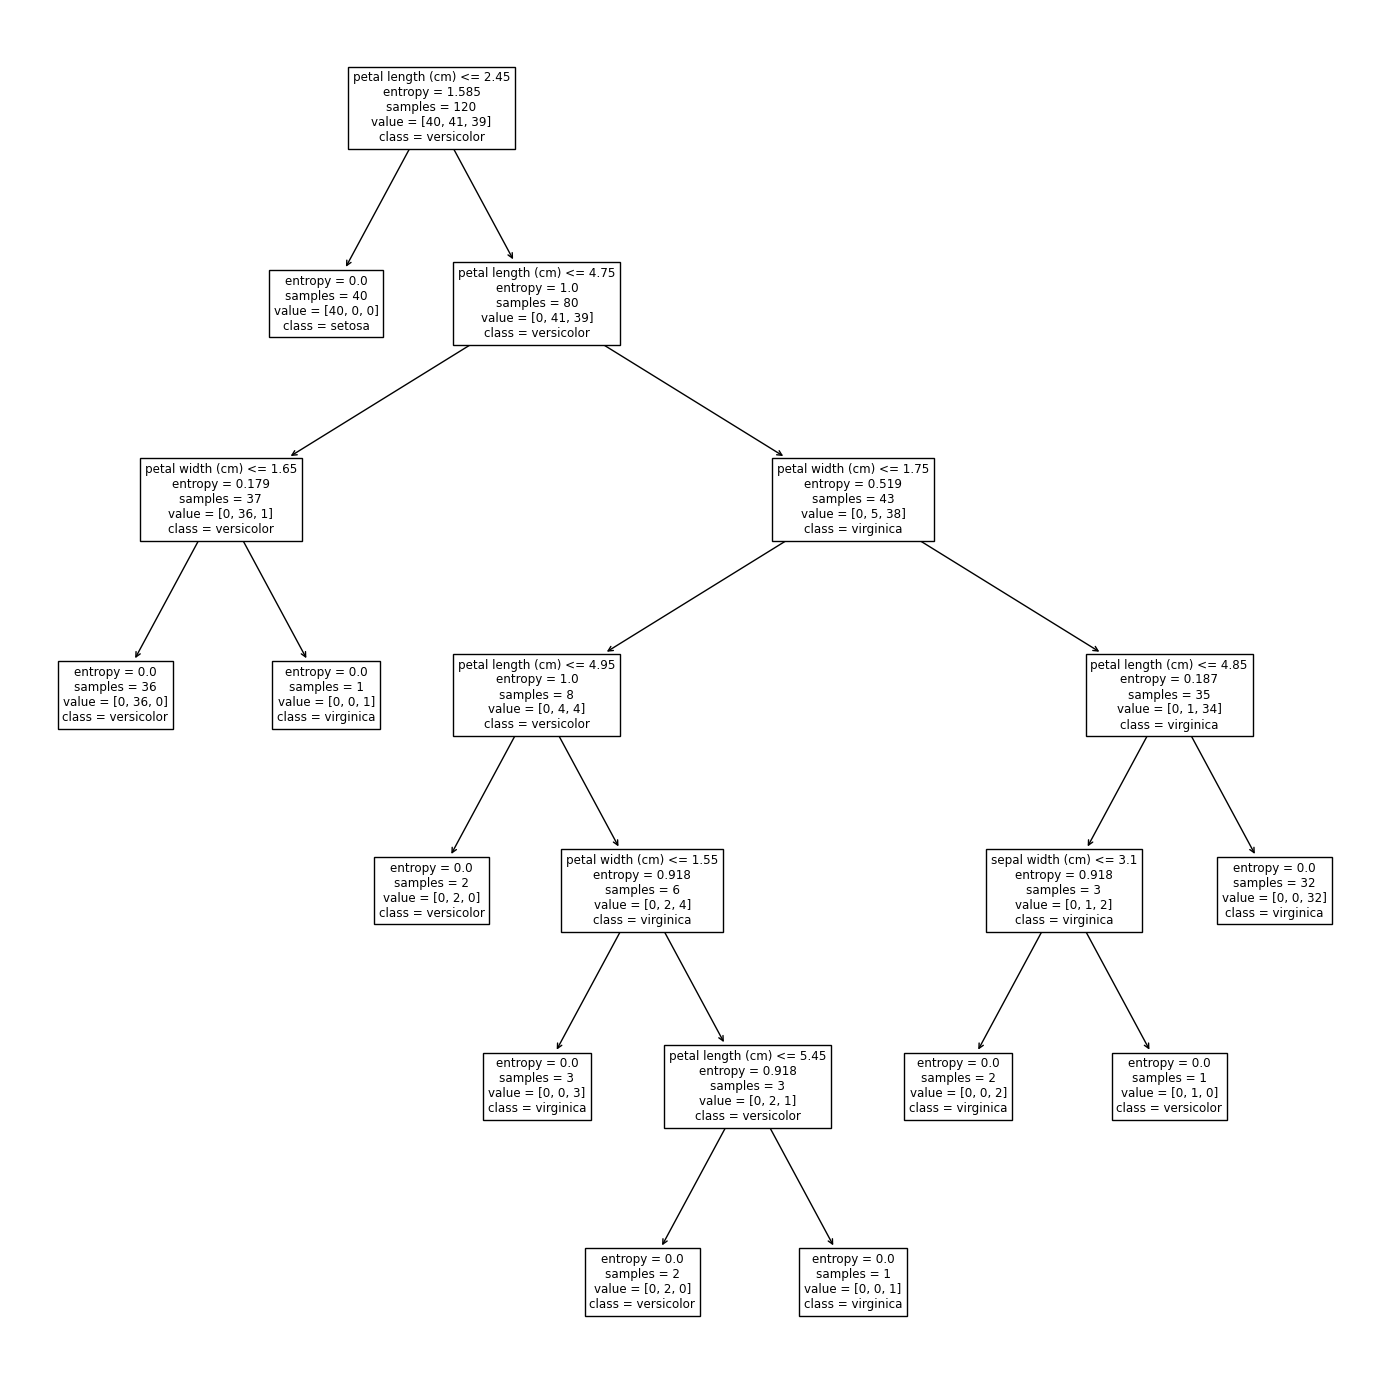

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

hyperparameters = {
            'criterion': 'entropy'
            }

model = DecisionTreeClassifier(random_state=42).set_params(**hyperparameters)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

The above tree keeps splitting till all the nodes are pure and can lead to overfitting. The next cell introduces some (hyper)parameters that help avoid overfitting.

1.0


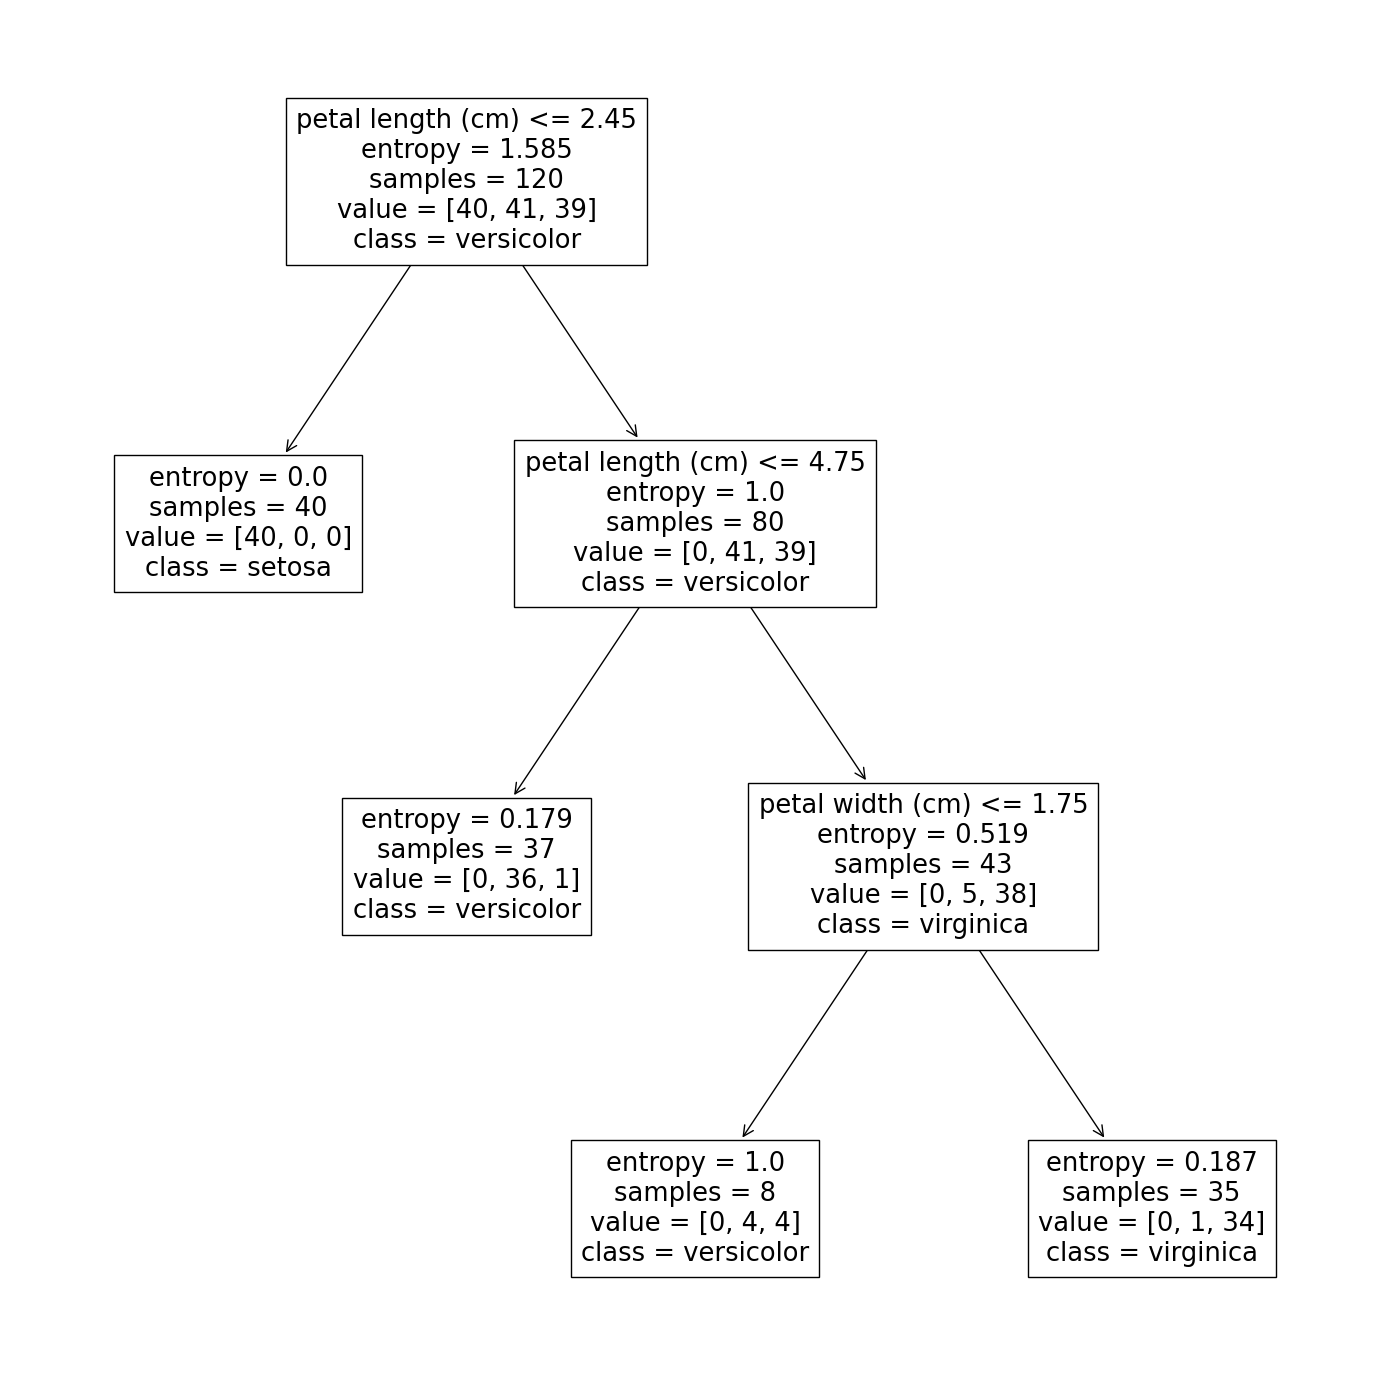

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

hyperparameters = {
            'criterion': 'entropy',
            'max_depth': 3,
            'max_leaf_nodes': 4
            }

model = DecisionTreeClassifier(random_state=42).set_params(**hyperparameters)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

### Tuning Random Forest (Hyper)Parameters

**Focusing on Tree Structure and Complexity:**

* **`min_samples_split`**: This controls the minimum number of samples required to split an internal node.
    * **Suggested Values:** `[2, 5]`
    * **Justification:** A smaller value (like 2) allows for more complex trees that might overfit, while a larger value (like 5) can help prevent overfitting by ensuring nodes only split if they contain a reasonable number of data points. Limiting to two values keeps the search space manageable.
* **`min_samples_leaf`**: This controls the minimum number of samples required to be at a leaf node.
    * **Suggested Values:** `[1, 3]`
    * **Justification:** Similar to `min_samples_split`, a smaller value (like 1) can lead to more complex trees, while a larger value (like 3) can promote more generalized models by requiring a minimum number of samples in the final predictions.
* **`max_features`**: This determines the number of features to consider when looking for the best split at each node.
    * **Suggested Values:** `['sqrt', 0.5]`
    * **Justification:**
        * `'sqrt'` (or 'log2') considers the square root of the total number of features. This is a common and often effective default.
        * `0.5` considers half of the total number of features. This provides a different level of randomness in feature selection compared to 'sqrt'. Limiting to two options keeps the search efficient.

**Hyperparameter Related to Randomness:**

* **`random_state`**: While not directly a tuning parameter for the model's complexity, it's crucial for reproducibility.
    * **Suggested Value:** `[42]` (or any single integer)
    * **Justification:** Setting a `random_state` ensures that the random processes within the Random Forest (like bootstrapping and feature selection) produce the same results each time the code is run. This is important for consistent evaluation and comparison of different hyperparameter settings. You might not include this in the *tuning* grid but should emphasize its importance for good practice.

**Considerations for Keeping Execution Time Down:**

* **Number of Hyperparameters:** The example you provided has 5 hyperparameters. Adding 3 more (`min_samples_split`, `min_samples_leaf`, `max_features`) will increase the size of the grid significantly (2 * 2 * 2 * 2 * 2 * 2 * 2 * 2 = 256 combinations). Be mindful of this. You might suggest that students initially try a smaller grid and then potentially expand if time allows.
* **Range of Values:** Keeping the number of values for each hyperparameter limited is key, as you've already done.

```python
hyperparameters = {
    'n_estimators': [50, 150],  # Slightly reduced max for faster execution
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 5],      # Slightly increased max depth
    'max_leaf_nodes': [6, 10], # Adjusted range
    'bootstrap': [True, False],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 0.6] # Adjusted value
}
```

**Important Considerations**

* **Justification is Key:** Explain *why* you chose the specific values for each hyperparameter. Your reasoning should be based on your understanding of how these parameters affect the model's bias-variance trade-off, complexity, and potential for overfitting or underfitting.
* **Cross-Validation Strategy:** Use an appropriate cross-validation strategy (e.g., Stratified K-Fold since it's likely a classification task with potentially imbalanced classes) to get a reliable estimate of the model's performance for each hyperparameter combination.
* **Computational Limits:** Keep in mind the constraints on their hyperparameter choices and grid size and computational time. You might need to start with a smaller grid and iterate if time permits.

Random forests create many decision trees that sample data. The bootstrap hyperparameter sets sampling with or without replacement.

**Rule**: Never make adjustments to your model based on test set results.
            

### Grid Search

See Grid Search Notebook

### Cross Validation

See Cross Validation Notebook

* K-fold vs Group K-fold
* Leave one out
* Monte Carlo

https://towardsdatascience.com/why-you-should-never-use-cross-validation-4360d42456ac

### Our Final Random Forest Model with Grid Search

In [ ]:
# create dataframe from sklearn iris dataset; print shape, info, and head
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
print(df.shape)
print(df.info())
df.head()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# train test split using 25% for test size; print X_train shape and head
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1),
                                                    df['species'],
                                                    test_size=0.25,
                                                    random_state=42)

print(X_train.shape)
print(X_train.head())

(112, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
4                  5.0               3.6                1.4               0.2
32                 5.2               4.1                1.5               0.1
142                5.8               2.7                5.1               1.9
85                 6.0               3.4                4.5               1.6
86                 6.7               3.1                4.7               1.5


In [ ]:
# implement a grid search using max_depth, min_samples_split, min_samples_leaf, bootstrap, and criterion (entropy and gini)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'n_estimators': [50, 150],
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 5],
    'max_leaf_nodes': [6, 10],
    'bootstrap': [True, False],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 0.6]
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = hyperparameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('best accuracy', best_accuracy)
print('best parameters', best_parameters)

best accuracy 0.9371212121212119
best parameters {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# model = RandomForestClassifier(bootstrap = False,
#                                criterion = 'entropy',
#                                max_depth = 3,
#                                min_samples_leaf = 5,
#                                min_samples_split = 4,
#                                random_state = 42)
model = RandomForestClassifier(random_state = 42).set_params(**best_parameters) # * args, ** kwargs
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0
